In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')
df_neighbourhoods_crime = pd.read_csv('/content/neighbourhood-crime-rates - 4326.csv')

In [ ]:
df_listings.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,NaN,28,6,2017-08-07,0.05,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,NaN,180,167,2013-08-27,0.85,2,0,0,NaN
2,26654,"World Class @ CN Tower, convention centre, The...",113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,133.0,28,45,2025-02-01,0.25,3,140,2,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,365,31,2025-01-01,0.16,1,11,1,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,NaN,180,1,2010-08-11,0.01,2,0,0,NaN
5,40456,Downtown- King Size Bed and Parking,174063,Denis,NaN,South Parkdale,43.63539,-79.44010,Entire home/apt,NaN,750,113,2023-06-19,0.61,4,364,0,NaN
6,40701,Bright Beaches loft close to Queen and the lake,175687,John,NaN,The Beaches,43.67239,-79.28858,Entire home/apt,85.0,90,12,2025-06-06,0.08,1,293,2,NaN
7,44452,Yonge & Bloor Studio Skyline,195095,Wissam,NaN,Rosedale-Moore Park,43.67193,-79.38590,Entire home/apt,97.0,28,68,2025-10-22,0.37,13,365,1,NaN
8,44469,Yonge & Bloor 2 Bedroom Apartment,195095,Wissam,NaN,Rosedale-Moore Park,43.67129,-79.38634,Private room,88.0,30,8,2017-08-27,0.05,13,365,0,NaN
9,45399,Fountain View Studio - Eaton center,195095,Wissam,NaN,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,120.0,28,89,2024-08-17,0.49,13,345,0,NaN


In [ ]:
df_reviews.head(5)

,listing_id,date
0,9974111,2016-10-03
1,9974111,2017-01-04
2,9974111,2017-09-06
3,9974111,2017-09-21
4,9974111,2017-09-27


In [ ]:
df_neighbourhoods.head(10)

,neighbourhood_group,neighbourhood
0,NaN,Agincourt North
1,NaN,Agincourt South-Malvern West
2,NaN,Alderwood
3,NaN,Annex
4,NaN,Banbury-Don Mills
5,NaN,Bathurst Manor
6,NaN,Bay Street Corridor
7,NaN,Bayview Village
8,NaN,Bayview Woods-Steeles
9,NaN,Bedford Park-Nortown


In [ ]:
df_neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
listings_per_neighbourhood = df_listings['neighbourhood'].value_counts().reset_index()
listings_per_neighbourhood.columns = ['neighbourhood', 'number_of_listings']
display(listings_per_neighbourhood.head(25))

,neighbourhood,number_of_listings
0,Waterfront Communities-The Island,3542
1,Niagara,834
2,Annex,714
3,Church-Yonge Corridor,677
4,Kensington-Chinatown,584
5,Moss Park,523
6,Dovercourt-Wallace Emerson-Junction,512
7,Trinity-Bellwoods,507
8,Bay Street Corridor,506
9,Willowdale East,463


In [21]:
df_neighbourhoods_crime.head(20)

,_id,AREA_NAME,HOOD_ID,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023,THEFTOVER_RATE_2024,THEFTOVER_RATE_2025,POPULATION_2025,geometry
0,1,South Eglinton-Davisville,174,55,56,66,73,74,62,74,...,13.797544,13.097577,16.740604,24.216984,11.665436,29.499613,21.188684,20.759809,28902,"{""coordinates"": [[[[-79.3863542900264, 43.6978..."
1,2,North Toronto,173,53,57,47,61,66,84,80,...,36.176834,26.750484,43.862396,11.872959,22.540291,36.945164,30.007502,24.293072,20582,"{""coordinates"": [[[[-79.3974398976879, 43.7069..."
2,3,Dovercourt Village,172,62,65,92,105,106,113,91,...,29.658190,29.775198,22.602276,15.283509,30.555344,22.610792,52.426601,22.850180,13129,"{""coordinates"": [[[[-79.4341164165158, 43.6601..."
3,4,Junction-Wallace Emerson,171,164,159,171,161,163,186,171,...,36.188179,15.985932,36.070698,32.293224,31.383625,33.834587,47.279606,32.400906,27777,"{""coordinates"": [[[[-79.4387032547807, 43.6676..."
4,5,Yonge-Bay Corridor,170,387,521,481,602,576,660,377,...,346.893738,478.723419,258.569733,187.630798,351.821198,337.443207,296.040466,210.071426,16661,"{""coordinates"": [[[[-79.3840431592607, 43.6449..."
5,6,Bay-Cloverhill,169,107,101,122,155,136,166,106,...,52.975456,56.382500,38.224213,53.304905,45.018005,60.132290,108.211052,87.176720,24089,"{""coordinates"": [[[[-79.3874287290052, 43.6605..."
6,7,Bendale-Glen Andrew,156,137,149,174,168,183,204,134,...,64.292778,39.300453,19.718033,34.775696,64.219727,96.885139,71.790947,82.332428,20648,"{""coordinates"": [[[[-79.2639217033978, 43.7517..."
7,8,Downsview,155,111,125,128,133,121,138,124,...,17.353077,38.945145,53.992764,26.392187,75.304985,80.071594,62.525124,82.411621,23055,"{""coordinates"": [[[[-79.4645340574507, 43.7501..."
8,9,Oakdale-Beverley Heights,154,220,232,230,277,302,295,235,...,51.478848,32.014637,63.102859,80.328453,82.947701,96.870659,61.430092,77.481445,24522,"{""coordinates"": [[[[-79.5119271703944, 43.7345..."
9,10,Avondale,153,32,31,37,44,65,40,41,...,34.293552,27.220142,20.427618,34.218452,59.749054,31.748047,18.382353,18.152115,16527,"{""coordinates"": [[[[-79.4083873426619, 43.7536..."


#Compare crime and theft rates with nb of listings per area


In [31]:
df_crime_data = df_neighbourhoods_crime[['AREA_NAME', 'ASSAULT_2025', 'THEFTOVER_RATE_2025']].copy()
df_crime_data.rename(columns={'AREA_NAME': 'neighbourhood'}, inplace=True)
display(df_crime_data.head())

,neighbourhood,ASSAULT_2025,THEFTOVER_RATE_2025
0,South Eglinton-Davisville,126,20.759809
1,North Toronto,129,24.293072
2,Dovercourt Village,128,22.850180
3,Junction-Wallace Emerson,200,32.400906
4,Yonge-Bay Corridor,560,210.071426


In [32]:
merged_df = pd.merge(listings_per_neighbourhood, df_crime_data, on='neighbourhood', how='inner')
display(merged_df.head())

,neighbourhood,number_of_listings,ASSAULT_2025,THEFTOVER_RATE_2025
0,Annex,714,416,114.324318
1,Kensington-Chinatown,584,460,219.288635
2,Moss Park,523,655,64.592896
3,Trinity-Bellwoods,507,162,70.126228
4,Little Portugal,391,133,49.188393


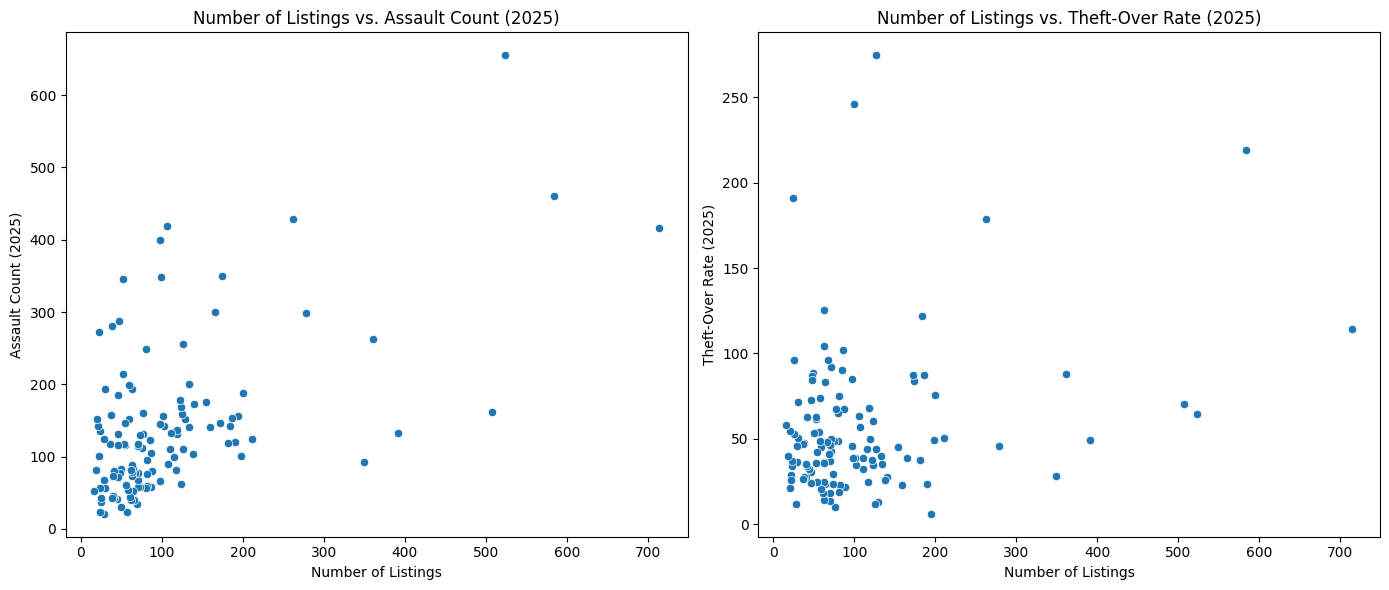

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='number_of_listings', y='ASSAULT_2025', data=merged_df)
plt.title('Number of Listings vs. Assault Count (2025)')
plt.xlabel('Number of Listings')
plt.ylabel('Assault Count (2025)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='number_of_listings', y='THEFTOVER_RATE_2025', data=merged_df)
plt.title('Number of Listings vs. Theft-Over Rate (2025)')
plt.xlabel('Number of Listings')
plt.ylabel('Theft-Over Rate (2025)')

plt.tight_layout()
plt.show()

#Cluster based on area

In [41]:
neighbourhood_coordinates = df_listings.groupby('neighbourhood')[['latitude', 'longitude']].mean().reset_index()
display(neighbourhood_coordinates.head())


neighbourhood_coordinates = df_listings.groupby('neighbourhood')[['latitude', 'longitude']].mean().reset_index()
display(neighbourhood_coordinates.head())

,neighbourhood,latitude,longitude
0,Agincourt North,43.807494,-79.272499
1,Agincourt South-Malvern West,43.788090,-79.270339
2,Alderwood,43.606175,-79.541387
3,Annex,43.671013,-79.400810
4,Banbury-Don Mills,43.736137,-79.349796


,neighbourhood,latitude,longitude
0,Agincourt North,43.807494,-79.272499
1,Agincourt South-Malvern West,43.788090,-79.270339
2,Alderwood,43.606175,-79.541387
3,Annex,43.671013,-79.400810
4,Banbury-Don Mills,43.736137,-79.349796


In [42]:
#cobine data for clustering
df_clustered = pd.merge(merged_df, neighbourhood_coordinates, on='neighbourhood', how='inner')
display(df_clustered.head())

,neighbourhood,number_of_listings,ASSAULT_2025,THEFTOVER_RATE_2025,latitude,longitude
0,Annex,714,416,114.324318,43.671013,-79.400810
1,Kensington-Chinatown,584,460,219.288635,43.653193,-79.398853
2,Moss Park,523,655,64.592896,43.656439,-79.369871
3,Trinity-Bellwoods,507,162,70.126228,43.650377,-79.413625
4,Little Portugal,391,133,49.188393,43.646459,-79.428163


In [43]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = df_clustered[['latitude', 'longitude', 'number_of_listings', 'ASSAULT_2025', 'THEFTOVER_RATE_2025']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

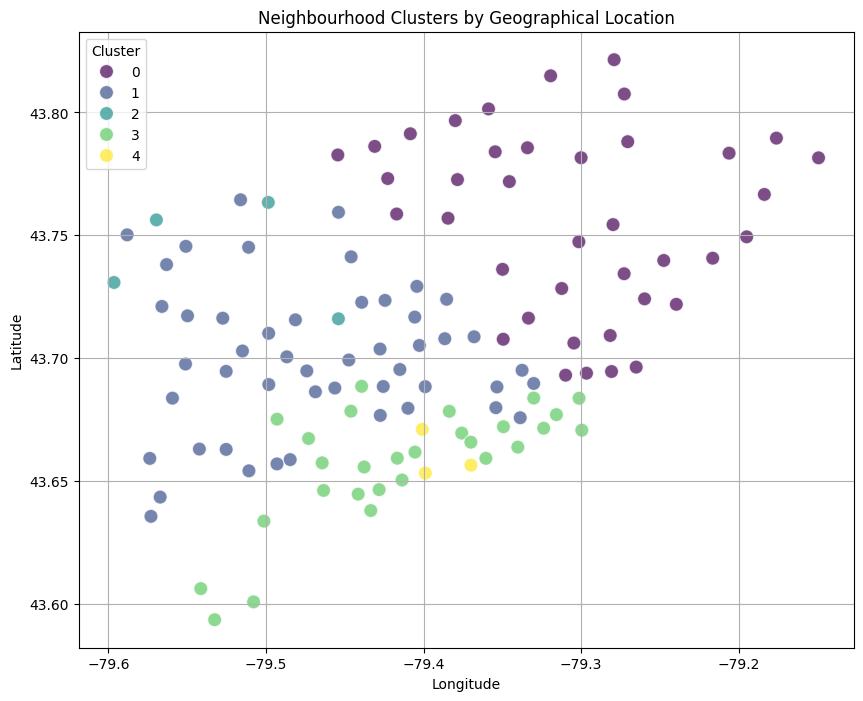

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_clustered['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_clustered, palette='viridis', s=100, alpha=0.7)
plt.title('Neighbourhood Clusters by Geographical Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [45]:
cluster_means = df_clustered.groupby('cluster')[['latitude', 'longitude', 'number_of_listings', 'ASSAULT_2025', 'THEFTOVER_RATE_2025']].mean()
display(cluster_means)

,latitude,longitude,number_of_listings,ASSAULT_2025,THEFTOVER_RATE_2025
cluster,,,,,
0,43.756131,-79.305606,83.076923,145.333333,50.419379
1,43.699859,-79.468117,56.061224,89.938776,45.587002
2,43.741612,-79.529659,127.750000,292.000000,222.593784
3,43.657084,-79.413851,178.214286,154.857143,47.847553
4,43.660215,-79.389845,607.000000,510.333333,132.735283
